In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
exp_data = pd.read_csv('/content/drive/MyDrive/MASS Project/Models/Dataset - Minuli/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('/content/drive/MyDrive/MASS Project/Models/Dataset - Minuli/demographic_data_update_03.csv')

In [ ]:
exp_data.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,32.490001,Intermediate,High Low,0.846176


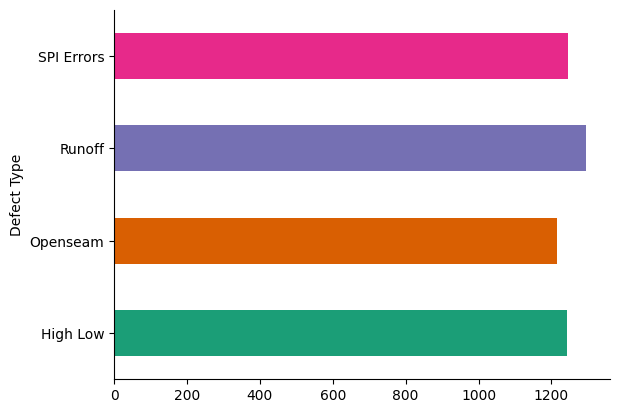

In [ ]:
# @title Defect Type

from matplotlib import pyplot as plt
import seaborn as sns
exp_data.groupby('Defect Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
exp_data2.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,25.788073,Beginner,SPI Errors,48.9066
1,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,22.189826,Beginner,SPI Errors,15.1966
2,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,24.385796,Beginner,Runoff,28.4736
3,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,29.253169,Beginner,Runoff,9.8801
4,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,20.239241,Beginner,SPI Errors,47.2479


In [ ]:
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

In [ ]:
merged_data.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,32.490001,Intermediate,High Low,0.846176


In [ ]:
merged_data.count()

ID                       10000
Name                     10000
Joining Date             10000
Age                      10000
Birth Date               10000
Gender                   10000
Education                10000
Average Working Hours    10000
Skill Level              10000
Defect Type              10000
Defect Rate              10000
dtype: int64

In [ ]:
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']

# Drop the specified fields
# merged_data.drop(columns=fields_to_drop, inplace=True)
merged_data = exp_data.drop(columns=fields_to_drop, inplace=True)

In [ ]:
exp_data.head()

,Age,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,25,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,25,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,25,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,25,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,25,Female,Diploma,32.490001,Intermediate,High Low,0.846176


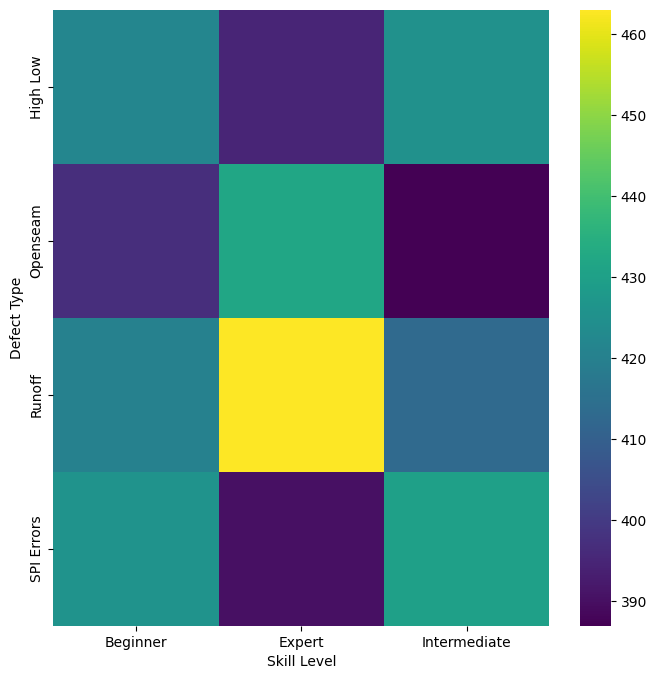

In [ ]:
# @title Skill Level vs Defect Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Defect Type'].value_counts()
    for x_label, grp in exp_data.groupby('Skill Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Skill Level')
_ = plt.ylabel('Defect Type')

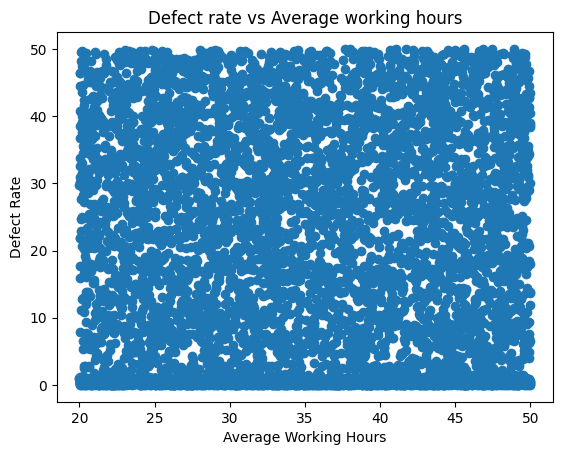

In [ ]:
# @title Defect rate vs Average working hours

import matplotlib.pyplot as plt
plt.scatter(merged_data['Average Working Hours'], merged_data['Defect Rate'])
plt.xlabel('Average Working Hours')
plt.ylabel('Defect Rate')
_ = plt.title('Defect rate vs Average working hours')

In [ ]:
exp_data.shape

(5000, 7)

In [ ]:
Y = exp_data['Defect Rate']
X = exp_data.drop("Defect Rate", axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]
one_hot = OneHotEncoder()
transformed = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformed.fit_transform(X)
transformed_x

array([[ 1.        ,  0.        ,  1.        , ...,  1.        ,
        25.        , 30.95237441],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        25.        , 31.08347405],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        25.        , 37.24662266],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 27.53756441],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 26.17663904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 25.4025521 ]])

In [ ]:
transformed_x.shape

(5000, 13)

In [ ]:
# transformed_x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model
model = RandomForestRegressor()
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_x, Y, test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

-0.13428804238652003

In [ ]:
input_data = (16, 1, 4, 30, 2, 0, 0, 2, 0, 0, 0, 0, 0)



# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0.63827319]
